# 2차원 데이터의 정리

## 두 데이터 사이의 관계를 나타내는 지표

In [ ]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision',3)


In [ ]:
!pwd

/content


In [ ]:
_?



In [ ]:
# 구글 드라이브에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/누구나 파이썬 통계분석/python_stat_sample-master/data/ch2_scores_em.csv',index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [ ]:
df[['english','mathematics']][0:10]

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [ ]:
en_scores = np.array(df['english'][0:10])
ma_scores = np.array(df['mathematics'][0:10])

scores_df = pd.DataFrame({'english' : en_scores, 'mathematics' : ma_scores}, index =pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 共分散

In [ ]:
summary_df= scores_df.copy()
summary_df['english_deviation'] = summary_df['english']-summary_df['english'].mean(0)
summary_df['mathematics_deviation'] = summary_df['mathematics']-summary_df['mathematics'].mean(0)
summary_df['product of deviations'] = summary_df['english_deviation']*summary_df['mathematics_deviation']

summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


62.800

In [ ]:

cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

(62.800000000000004, 62.800000000000004)

(86.0, 68.44000000000001)

(86.0, 68.44000000000001)

### 상관계수

0.8185692341186713

In [ ]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

### 산점도

In [ ]:
import matplotlib.pyplot as plt



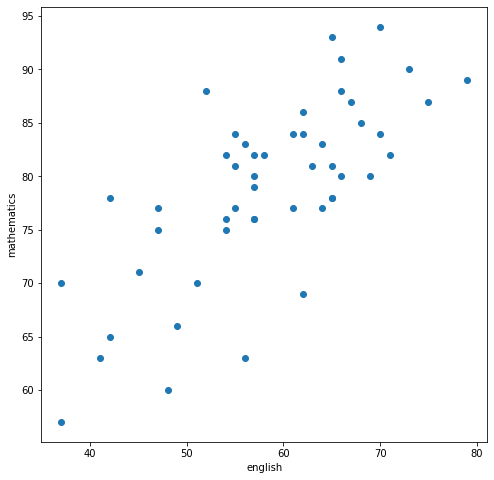

In [ ]:


plt.show()

### 회귀직선

In [ ]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max()) 
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color = 'grey', label =  f'{poly_fit[1] :.2f}+{poly_fit[0] : .2f}x'  )


# 범례의 표시
ax.legend(loc = 'upper left')

plt.show()

NameError: ignored

### 히트맵

In [ ]:
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c=ax.hist2d(english_scores,math_scores,
            bins=[9,8],range=[(35,80),(55,95)]
            ) 
ax.set_xlabel('english')
ax.set_xlabel('mathmatics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바의 표시
fig.colorbar(c[3],ax=ax)

plt.show()

NameError: ignored

## 앤스컴의 예

In [ ]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe data = np.load()

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
stats_df = pd.DataFrame(index =['X_mean', 'X_variance','Y_mean','Y_variance','X&Y_correlation',
                                'X&Y_regression line'])
for

stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


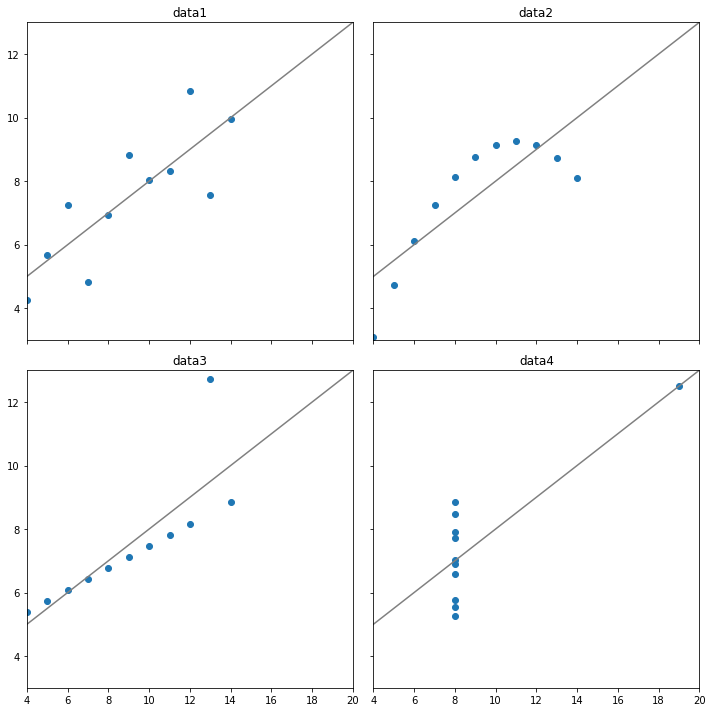

In [ ]:
# 그래프를 그리기 위한 영역을 2x2개 생성

fig.axes= plt.subplost(nrows=2,nonlocal=2,figsize=(10,10),
                       sharex=True, sharey=True)
xs = np.linspace(0,30,100)
for i , data in enumerate(anscombe_data):
  poly_fit = np.polyfit(data)[:,0],data[:,1])
  poly_1d = np.poly1d(poly_fit)
  ys = poly_1d(xs)
  

    # 그리는 영역을 선택
ax= axes[i//2, ]i%2
ax.set_xlim([4.20])
ax.set_ylim([3.13])
    # 타이틀을 부여
ax.set_title(f'data{i+1')
ax.scatter(data[:,0],data[: 1])
ax.plot(xs,ys,color='gray')
# 그래프 사이의 간격을 좁힘
plt.tight_layout
plt.show()